In [12]:
import sys
sys.path.insert(0, '/home/brian/Desktop/Projects/final_year_project/models')

In [13]:
import LSTM_Model
import matplotlib.pyplot as plt
import datetime

In [14]:
stock_models = {}
stock_tests = {}
stock_val_losses = {}
stock_mae = {}
stock_rmse = {}
tickers = ["GOOG", "MSFT", "AMZN", "AAPL", "META"]

In [15]:
start = datetime.datetime(2017, 1, 1)
end = datetime.datetime(2023, 12, 31)

In [16]:
for ticker in tickers:
    stock_models[ticker] = LSTM_Model.LSTM_Model(stock_ticker=ticker, start=start, end=end, n_epochs=100, batch_size=32, look_back=32, num_features=1)
    stock_mae[ticker], stock_rmse[ticker] = stock_models[ticker].predict()
    stock_tests[ticker] = stock_models[ticker].get_test()
    stock_val_losses[ticker] = stock_models[ticker].get_validation_loss()

[*********************100%%**********************]  1 of 1 completed


9/9 [==============================] - 2s 37ms/step


[*********************100%%**********************]  1 of 1 completed


9/9 [==============================] - 1s 16ms/step


[*********************100%%**********************]  1 of 1 completed


9/9 [==============================] - 1s 17ms/step


[*********************100%%**********************]  1 of 1 completed


9/9 [==============================] - 1s 17ms/step


[*********************100%%**********************]  1 of 1 completed


9/9 [==============================] - 1s 13ms/step


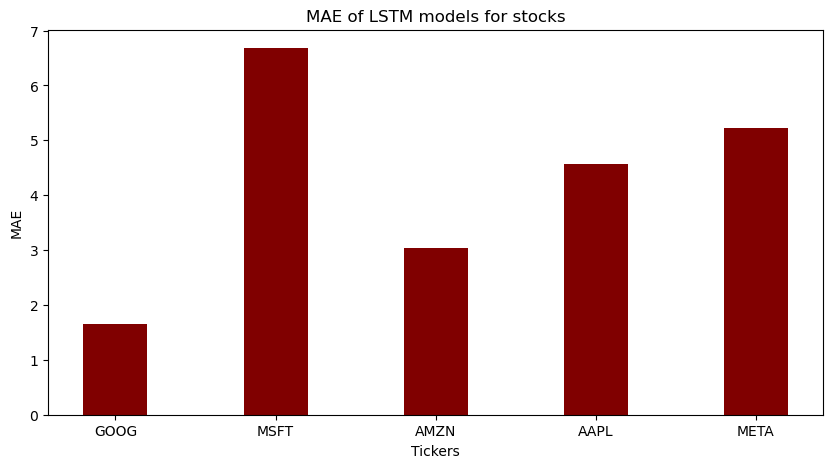

In [17]:
mae_values = list(stock_mae.values())
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(tickers, mae_values, color ='maroon', 
        width = 0.4)
 
plt.xlabel("Tickers")
plt.ylabel("MAE")
plt.title("MAE of LSTM models for stocks")
plt.show()

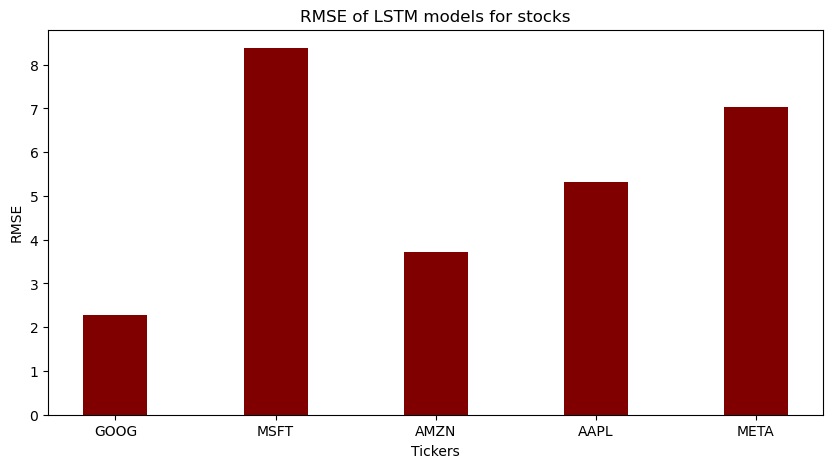

In [18]:
rmse_values = list(stock_rmse.values())
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(tickers, rmse_values, color ='maroon', 
        width = 0.4)
 
plt.xlabel("Tickers")
plt.ylabel("RMSE")
plt.title("RMSE of LSTM models for stocks")
plt.show()

/tmp/ipykernel_4132/2361628061.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


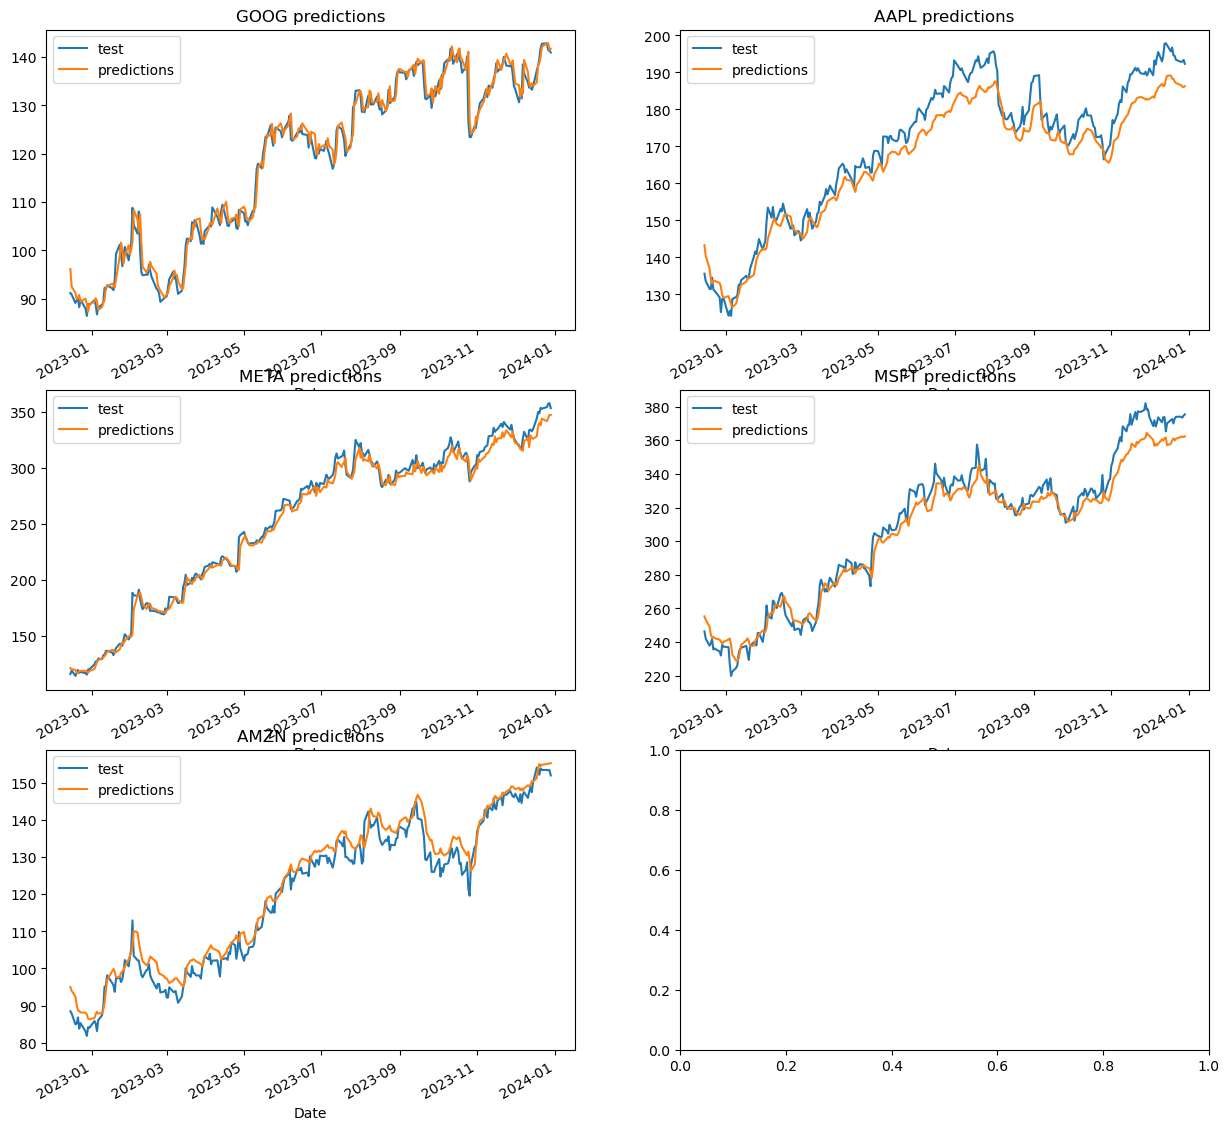

In [19]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(15)
fig.set_figwidth(15)
i = j = 0

for ticker in stock_tests.keys():
    stock_tests[ticker].plot(ax=axes[i, j])
    axes[i, j].set_title(f"{ticker} predictions")
    i = (i+1) % 3
    j = (j+1) % 2
fig.show()

/tmp/ipykernel_4132/1885570865.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


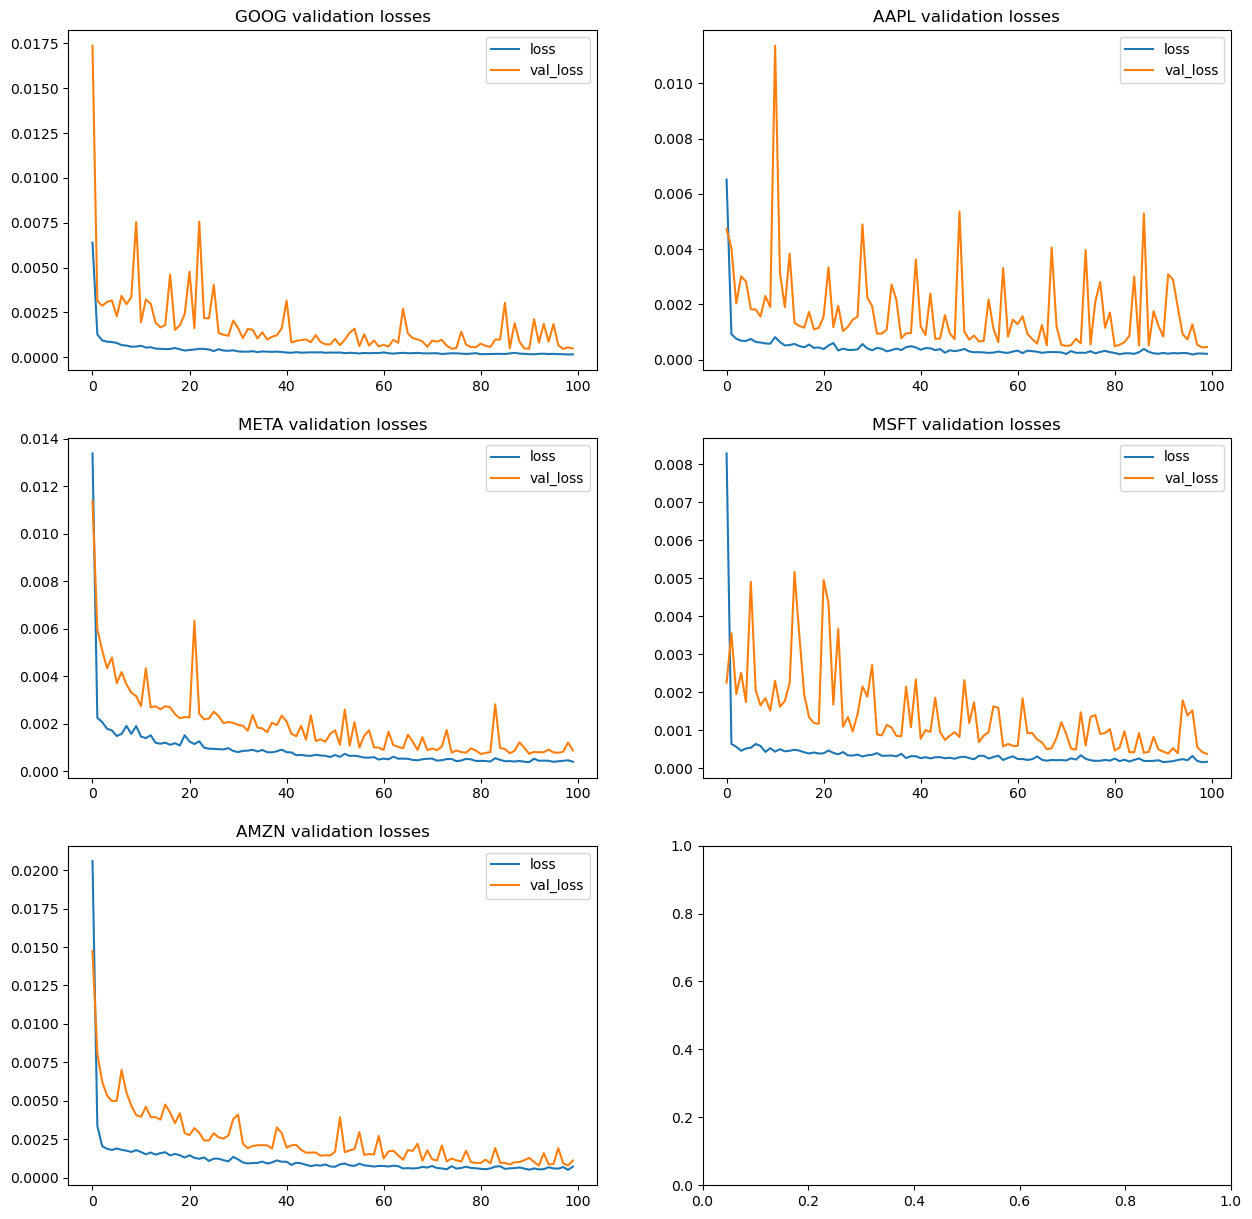

In [20]:
fig2, axes2 = plt.subplots(nrows=3, ncols=2)
fig2.set_figheight(15)
fig2.set_figwidth(15)
i = j = 0

for ticker in stock_val_losses.keys():
    stock_val_losses[ticker].plot(ax=axes2[i, j])
    axes2[i, j].set_title(f"{ticker} validation losses")
    i = (i+1) % 3
    j = (j+1) % 2
fig2.show()

In [21]:
stock_mae

{'GOOG': 1.6532403061673102,
 'MSFT': 6.681959481074892,
 'AMZN': 3.0328386679463004,
 'AAPL': 4.566804761630822,
 'META': 5.216976706552323}

In [22]:
stock_rmse

{'GOOG': 2.272709787416635,
 'MSFT': 8.380817725485247,
 'AMZN': 3.7204751368148967,
 'AAPL': 5.330110851629525,
 'META': 7.043095298841616}